Bbox(x0=0.125, y0=0.4802941176470588, x1=0.9, y1=0.88)


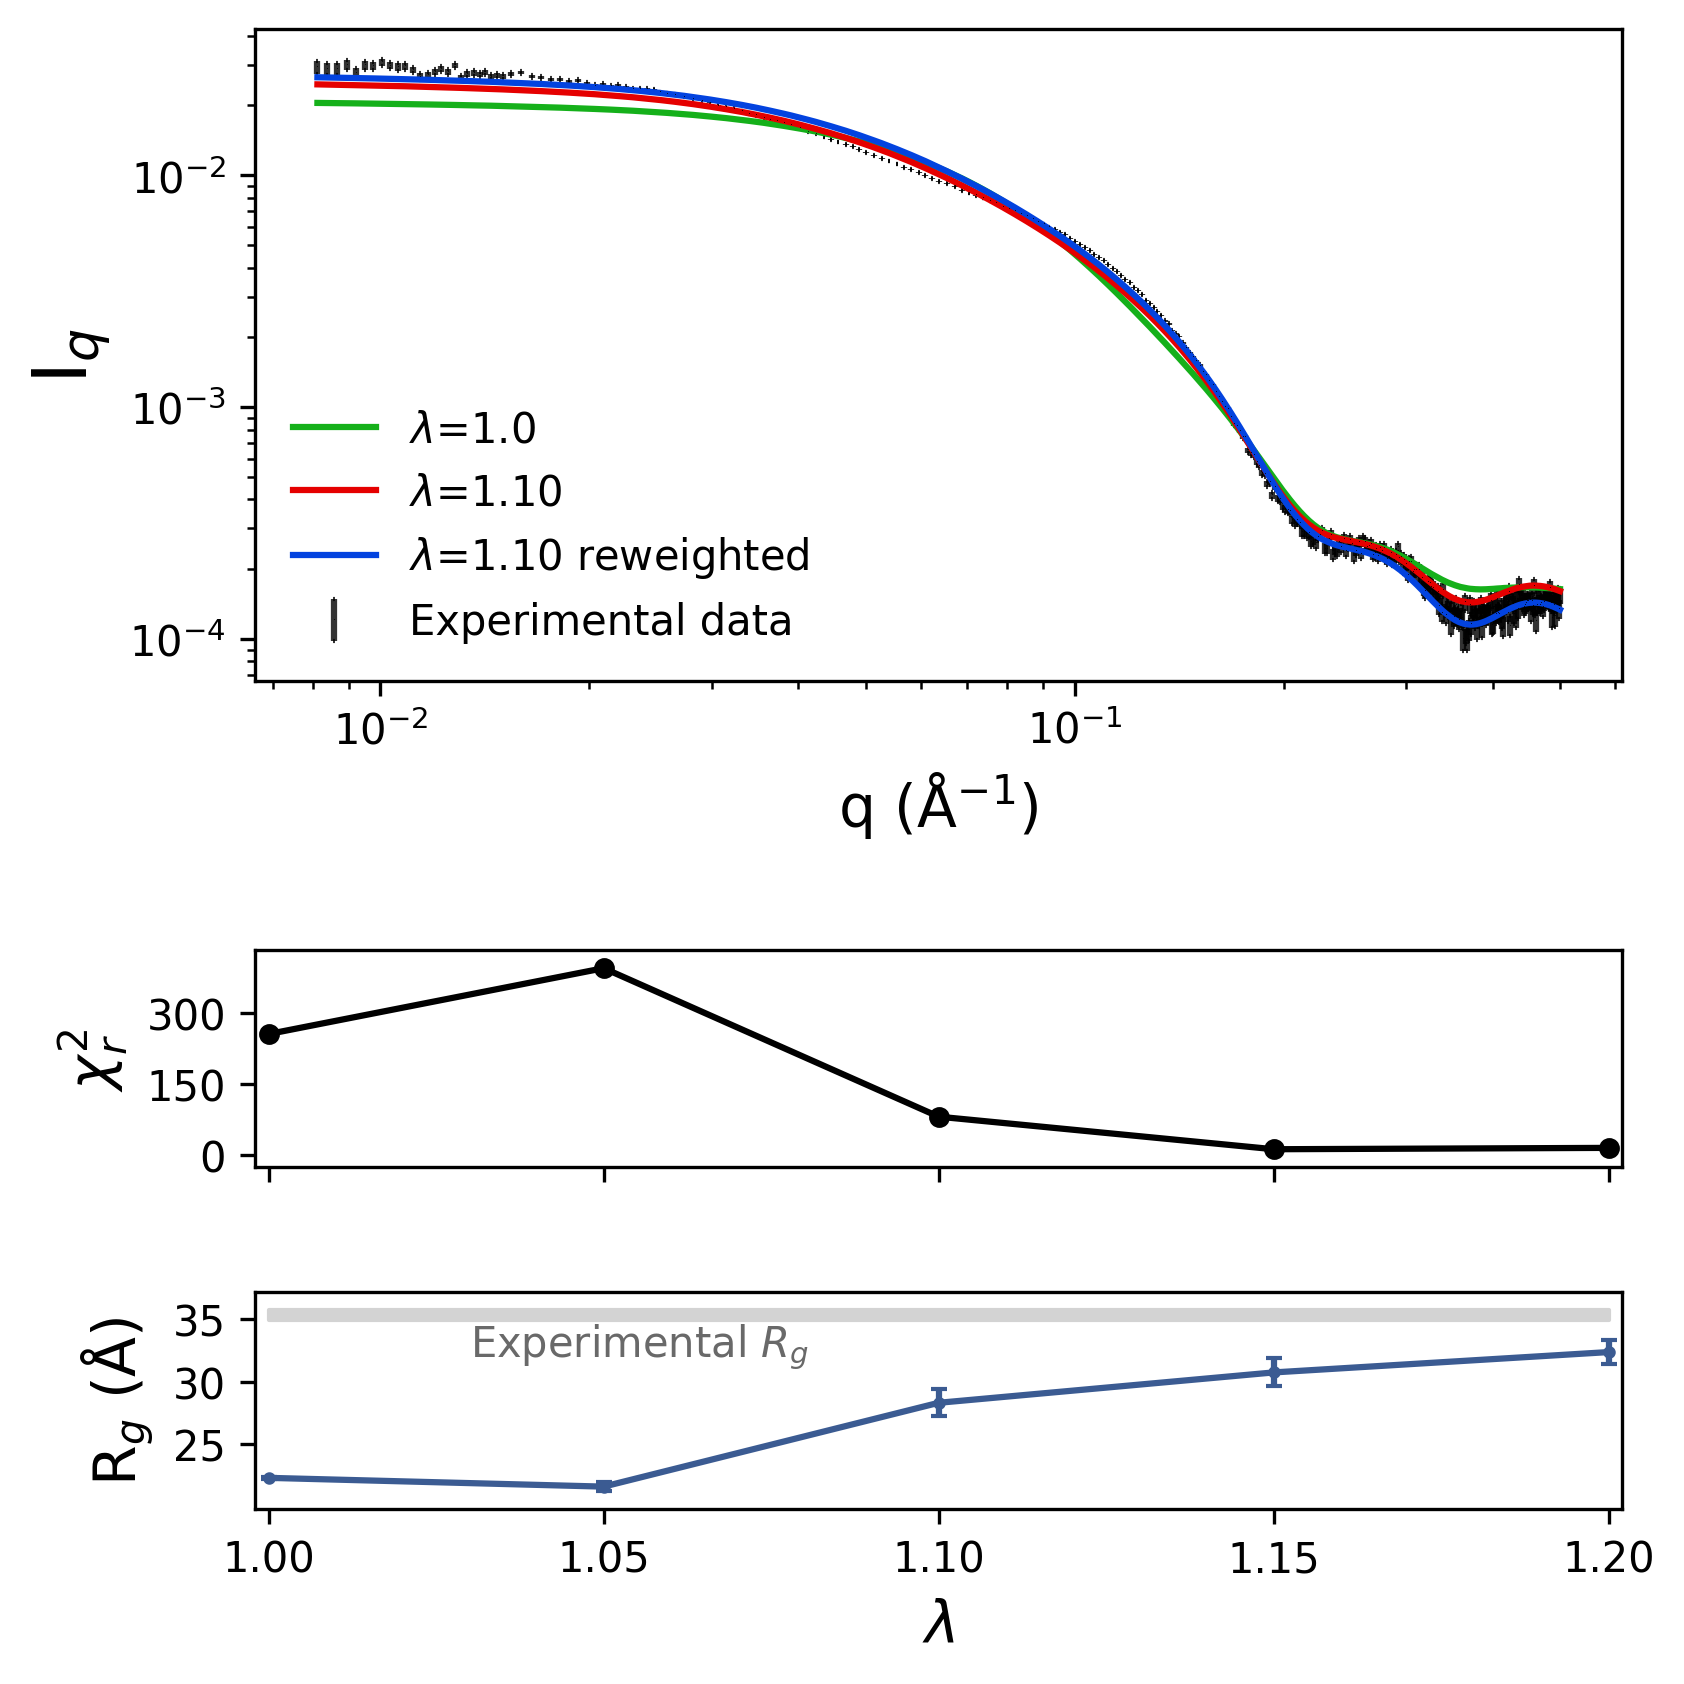

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns #https://xkcd.com/color/rgb/
from matplotlib.ticker import FormatStrFormatter
from matplotlib import gridspec


file_list = ['data_WT_saxs_1.0.dat','data_WT-1.10_05122022.dat']

c1 = sns.xkcd_rgb["black"]
c2 = sns.xkcd_rgb["red"]
c3 = sns.xkcd_rgb["sky blue"]
c4 = sns.xkcd_rgb["green"]
c5 = sns.xkcd_rgb["orange"]
c6 = sns.xkcd_rgb["blue"]
c7 = sns.xkcd_rgb["denim blue"]
color_list = [c1,c2,c3,c4,c5,c6]

fig, ax = plt.subplots(nrows=3, ncols=1, dpi=300,figsize=(5.5,5.5), gridspec_kw=dict(height_ratios=[1.5,0.5,0.5],hspace=0.2),constrained_layout=True)


#plot saxs fitting
data = np.loadtxt(file_list[0])
x = data[:,0]
avg_exp = data[:,1]
sigma_exp = data[:,2]
avg_calc = data[:,3]

ax[0].errorbar(x, avg_exp,yerr=sigma_exp,fmt=',', capsize=0.2, color=c1,alpha=0.8,label='Experimental data')
ax[0].plot(x, avg_calc,color=c4,label=r'$\lambda$=1.0')

data = np.loadtxt(file_list[1])
avg_calc = data[:,3]
avg_calc_rew = data[:,4]
ax[0].plot(x, avg_calc,color=c2,label=r'$\lambda$=1.10')
ax[0].plot(x, avg_calc_rew,color=c6,label=r'$\lambda$=1.10 reweighted')

#ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
#ax.set_ylim(0,1.05)
#ax.set_xlim(0.,150.)
ax[0].set_ylabel(r'I$_{q}$', fontsize=18)
ax[0].set_xlabel(r'q (Å$^{-1}$)', fontsize=14)
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].legend(frameon=False)

#plot PW-rescaling assessment


SAXS_rg = np.zeros(5) + 35.3
SAXS_rg_error = np.zeros(5) + 0.4
thetas = np.array([1.0, 1.05, 1.10,1.15, 1.20])
M3_rg =np.array([2.233577, 2.163699, 2.831274, 3.073073, 3.235164 ])*10
M3_rg_err =np.array([0.009194, 0.035357, 0.108571, 0.111684, 0.094529 ])*10
M3_chi2 = np.array([256.25,395.87,80.91,11.90,14.76])
ax[1].plot(thetas, M3_chi2, marker='o', markersize=4, color='k', label='M3_chi2')
ax[1].set_ylabel(r'$\chi^{2}_{r}$', weight='bold', fontsize=14)
ax[1].set_yticks([0.0,150.0,300.0])
ax[1].set_xticks(thetas)

#trick to hide labels in ax[1]
labels = [item.get_text() for item in ax[1].get_xticklabels()]
empty_string_labels = ['']*len(labels)
ax[1].set_xticklabels(empty_string_labels)
ax[1].margins(x=0.01,y=0.1)
#ax[2].plot(thetas, SAXS_rg, color='black', label='SAXS')
ax[2].fill_between(thetas, SAXS_rg-SAXS_rg_error, SAXS_rg+SAXS_rg_error, color='lightgrey')
ax[2].errorbar(thetas, M3_rg, yerr=M3_rg_err, marker='o', markersize=2, capsize=2, color=c7)
ax[2].set_xlabel(r'$\lambda$', fontsize=14)
ax[2].set_ylabel(r'R$_{g}$ (Å)', fontsize=14)
ax[2].set_xticks([1.0,1.05,1.10,1.15,1.20])
ax[2].set_yticks([25.0,30.0,35.0,40.0])
ax[2].margins(x=0.01,y=0.1)
ax[2].text(1.03,32,'Experimental $R_g$', color='dimgray', fontfamily='sans-serif')
print(ax[0].get_position())
#fig.text(0.01, 0.96, 'A', fontsize=16, fontfamily='sans-serif')
#fig.text(0.01, 0.35, 'B', fontsize=16, fontfamily='sans-serif')
#fig.text(0.01, 0.20, 'C', fontsize=16, fontfamily='sans-serif')

plt.savefig('fitting-plots.png')
plt.show()
